<a href="https://colab.research.google.com/github/RodrigoMarenda/Analise_de_Dados/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Rodrigo Belo Marenda

**Matrícula:** 4052024002404

**Dataset:** [Wine Quality](https://www.kaggle.com/datasets/sahideseker/wine-quality-classification)


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">Classificação da Qualidade de Vinhos</p>


[**Classificação da Qualidade de Vinhos**]

(https://github.com/RodrigoMarenda/Analise_de_Dados/blob/main/wine_image.jpeg)

(https://github.com/RodrigoMarenda/Sports_Predictions/blob/main/Imagens/wine_image.jpeg?raw=true)


# **Introdução**

### **Definição do Problema:**

O conjunto de dados Wine Quality é um conjunto de dados multivariado que consiste na avaliação de vinhos produzidos mundialmente. O objetivo principal é classificar o Rotuno do Vinho com com base em quatro características : acidez, residuo de açucar,	nivel alcolico	e densidade.


**Tipo de Problema**

**classificação supervisionada**  (Baixa, Média ou Alta Qualidade).


  - **Premissa**: Dados históricos dos jogos disputados, com variaveis que possam ser correlacionadas para determinar uma tendencia de resultado.

  - **Hipótese**: Um modelo de machine learning treinado com dados históricos, para identificar padrões que ajudem a prever o resultado das partidas.

  - **Variáveis**:

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?

- Existe uma correlação entre nacidez e nivel alcolico ?

- A espécie Iris setosa é mais facilmente separável das outras duas espécies?

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características (comprimento e largura da sépala, comprimento e largura da pétala), o objetivo é prever a qual das três classes (espécies de Íris) uma determinada flor pertence.

## Seleção de Dados

O dataset Iris é um conjunto de dados amplamente disponível e frequentemente incluído em bibliotecas de aprendizado de máquina, como *scikit-learn* no Python. Não é necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso.

## Atributos do Dataset

O dataset Iris contém 150 amostras, com 50 amostras de cada uma das três espécies de Íris. Possui cinco atributos:

- ***sepal length*** (comprimento da sépala em cm)
- ***sepal width*** (largura da sépala em cm)
- ***petal length*** (comprimento da pétala em cm)
- ***petal width*** (largura da pétala em cm)
- ***species*** (espécie de Íris: setosa, versicolor, virginica)

******************************************

## **Estrutura do projeto:**

[**1. Importação das Bibliotecas:**](#1)

[**2. Carga dos Dados:**](#2)

[**3. Analise de dados:**](#3)

[**4. Pré-processamento de dados:**](#4)

[**5. Interpretação e Geração de Insights:**](#5)

[**6. Visualização Final e Comunicação:**](#6)

[**7. Conclusão:**](#7)

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">1. Importação das Bibliotecas</p>

# Step 01: Importação das Bibliotecas

Nessa etapa estamos importanto todas as blibliotecas que serão utilizadas nesse algoritimo

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">2. Carga dos Dados</p>

# Step 01: Carga de Dados

Nessa etapa estamos realizando a carga dos dados, que estão armazendos em um arquivo do tipo csv (Comma-Separated Values). Esse dataset foi obtido no Site Kaggle: https://www.kaggle.com/datasets. Foram coletados dados de rotulos de vinhos, com o objetivo de realização de uma classificação dos Rotulos de acordo com as sua variaveis dipostas no dataset.

In [160]:
#--------------------------------------------------------#
# Informa a URL de importação do dataset                 #
#--------------------------------------------------------#

url ="https://raw.githubusercontent.com/RodrigoMarenda/Sports_Predictions/refs/heads/main/data/winemag-data_first25k.csv"


# Lê o arquivo
df = pd.read_csv(url, delimiter=';', low_memory=False)



# Exibir as primeiras linhas do DataFrame
df.head()



,id,country,description,designation,points,price,province,region_1,region_2,variety,winery,fixed_acidity,residual_sugar,alcohol,density,quality_label
0,0.0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96.0,2350.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,"9,3","6,4","13,6",10005,high
1,1.0,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96.0,1100.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,"11,2",2,14,"0,9912",medium
2,2.0,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96.0,900.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,"11,6","0,9","8,2","0,9935",low
3,3.0,US,"This spent 20 months in 30% new French oak, an...",Reserve,96.0,650.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,"12,9","6,6","12,7",10002,low
4,4.0,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95.0,660.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,"13,9","13,8","10,4","0,9942",medium


In [161]:
# Verifica o tamanho do dataset , total de linhas e colunas.
df.shape
print(f"O Dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

O Dataset tem 150931 linhas e 16 colunas.


In [162]:
# Verifica a estrutura do dataset, datatypes das colunas
df.dtypes

,0
id,float64
country,object
description,object
designation,object
points,float64
price,float64
province,object
region_1,object
region_2,object
variety,object


In [163]:
# Conversão de colunas numéricas que estão como objeto
numeric_object_cols = ['fixed_acidity', 'residual_sugar', 'alcohol', 'density']

# Substitui vírgula por ponto e converte para float
for col in numeric_object_cols:
    df[col] = df[col].astype(str).str.replace(',', '.').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

# remove a coluna de controle ID , para que nao seja considerada como dato de negócio
df = df.drop(columns='id')

#Mostra o resumo das informações estruturais do DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150931 entries, 0 to 150930
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         24999 non-null  object 
 1   description     25001 non-null  object 
 2   designation     17179 non-null  object 
 3   points          24279 non-null  float64
 4   price           22188 non-null  float64
 5   province        24277 non-null  object 
 6   region_1        20509 non-null  object 
 7   region_2        9411 non-null   object 
 8   variety         24279 non-null  object 
 9   winery          24279 non-null  object 
 10  fixed_acidity   25001 non-null  float64
 11  residual_sugar  25001 non-null  float64
 12  alcohol         25001 non-null  float64
 13  density         25001 non-null  float64
 14  quality_label   25001 non-null  object 
dtypes: float64(6), object(9)
memory usage: 17.3+ MB
None


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">3. Analise de Dados:</p>

Nessa etapa de Análise de Dados, também chamada de análise exploratória de dados ou Exploratory Data Analysis – EDA vamos entender, resumir e visualizar os dados antes da modelagem ou tomada de decisão.

# 3.1. Exploração Inicial

# Step 01: Dimensões do Dataset

In [ ]:
print("Informações do Dataframe:")

linhas, colunas = df.shape
print(f"🔢 Total de linhas: {linhas}")
print(f"🧱 Total de colunas: {colunas}")


# Step 02: Informações do DataSet

In [ ]:
print(df.info())

# Step 03: Amostra de Dados

In [ ]:
print("="*50)
print("Amostra das 10 Primeiras linhas do DataFrame")
print("="*50)
df.head(10)




In [ ]:
print("="*50)
print("Amostra das 10 ultimas linhas do DataFrame")
print("="*50)
df.tail(10)

# Step 04: Datatypes do DataSet

In [ ]:
print("="*40)
print("📊 Informações sobre o DataFrame")
print("="*40)


print("\n Tipos de dados (dtypes) do dataset: \n")
print(df.dtypes)

# Step 05: Resumo Estatistico

In [ ]:
print("="*40)
print("📊 Resumo Estatistico")
print("="*40)
df.describe()

In [ ]:
print("="*40)
print("📊 Resumo Estatistico")
print("="*40)

stats = df.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
estatisticas = stats.columns.tolist()

# Número de gráficos e layout (2 por linha)
num_graficos = len(estatisticas)
linhas = (num_graficos + 1) // 2  # arredonda pra cima
fig, axs = plt.subplots(linhas, 2, figsize=(8, linhas * 3))  # largura fixa, altura proporcional


axs = axs.flatten()  # facilitar iteração

for i, stat in enumerate(estatisticas):
    stats[stat].sort_values().plot(kind='bar', color='cornflowerblue', ax=axs[i])
    axs[i].set_title(stat.upper(), fontsize=10)
    axs[i].set_ylabel(stat, fontsize=8)
    axs[i].set_xlabel('Variáveis', fontsize=8)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)
    axs[i].tick_params(axis='x', rotation=45, labelsize=7)
    axs[i].tick_params(axis='y', labelsize=7)

# Remover qualquer eixo vazio (se número ímpar)
if num_graficos % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


# Step 06: Distribuição de Classes

In [ ]:
print("="*40)
print("📊 Distribuição de Classes")
print("="*40)

# Agrupamento das classes
class_counts = df['quality_label'].value_counts().reindex(['low', 'medium', 'high'])

# Plot
plt.figure(figsize=(5, 4))

ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

# Título e eixos
plt.title('Distribuição das Classes de Qualidade dos Rótulos')
plt.xlabel('Qualidade')
plt.ylabel('Contagem')

# Adiciona os valores nas barras
for i, v in enumerate(class_counts.values):
    ax.text(i, v + 10, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 3.2. Visualizações Graficas


> # 3.2.1. Visualizações Unimodais:


Nessa etapa vamos ver a distribuição dos dados por meio de Visualizações unimodais,  que são gráficos em que se observa uma única moda, uma única concentração central na distribuição dos valores.

>># Step 01: Histograma

Nesse step vamos observar por meio de histograma a distribuição de cada atributo do dataset.

In [ ]:
df.hist(figsize = (15,10))
plt.show()

**Conclusão:**

O dado price e density precisam ser verificados e tratados, avaliaremos a remoção ou transformação de outliers.

Os dados points, alcohol, fixed_acidity e residual_sugar parecem estar em condições boas para análise.

>># Step 02: Boxplot

Nesse step vamos observar por meio de graficos Boxpot a distribuição de cada atributo do dataset.

In [ ]:
# Boxplot
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

**Conclusão:**

points, fixed_acidity e alcohol apresentam distribuições coerentes e poucos outliers, logo estão adequadas para análise.

residual_sugar apresenta  uma alta variação.

price: apresenta muitos outliers e valores extremamente altos (até 20.000), que podem gerar problemas nas análises.

density: valores incoerentes, chegando a 10.000, pode indicar escalas fora de padrão e isso requer limpeza.

>># Step 03: Gráfico de Densidade

Nesse step vamos ver os gráficos de densidade, para ver a distribuição probabilística contínua de uma variável. podemos verificar onde os dados estão mais concentrados e como se distribuem ao longo do eixo dos valores.

In [ ]:
# Density Plot
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

**Conclusão:**

Variável price tem caracteristicas de ser unimodal, embora assimétrica.

As outras variaveis bimodais ou multimodais, a variavel density provavelmente vai precisar de precisa de limpeza, apresenta um um pico de escala e uma baixa frequencia.

>># Step 04: Histograma + KDE

Nesse Step vamos ver atraves do gráfico Histograma + KDE como os dados se distribuem e onde se concentram. Esse tipo de grafico é ideal para Detectar padrões, Avaliar necessidade de transformações e Decidir se vale a pena segmentar os dados.

In [ ]:
sns.set(style="whitegrid")

# Seleciona colunas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Configura o layout do grid
n_cols = 2  # dois por linha
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Cria a figura com subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

# Loop para gerar cada histograma com KDE
for i, col in enumerate(numeric_cols):
    data = df[col].dropna()
    sns.histplot(data, bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Histograma + KDE - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência / Densidade')

# Remove subplots vazios (caso o número de colunas não seja par)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Conclusão:**

Variaveis points e price tem caracteristicas unimodal.

As outras variáveis apresentam multimodalidade, necessidade de segmentação antes da modelagem.

A variavel density requer tratamento nos valores, pois apresenta escala fora de padrão.



> # 3.2.2 Visualizações Multimodais:

Nessa etapa vamos trabalhar com graficos multimodais que mostram distribuições de dados com dois ou mais picos. Esses picos representam valores ou intervalos onde os dados são mais frequentes.

Vamos trabalhasr com a variaveis abaixo que apresentam picos múltiplo:

fixed_acidity, residual_sugar e alcohol


>> # 3.2.2.1. Visualizações Multimodais - Numérica × Numérica

> # Step 01:  Scatter Plot

Nesse step xxxxxxxxxxxxxxxxxxxxxxxxxxx

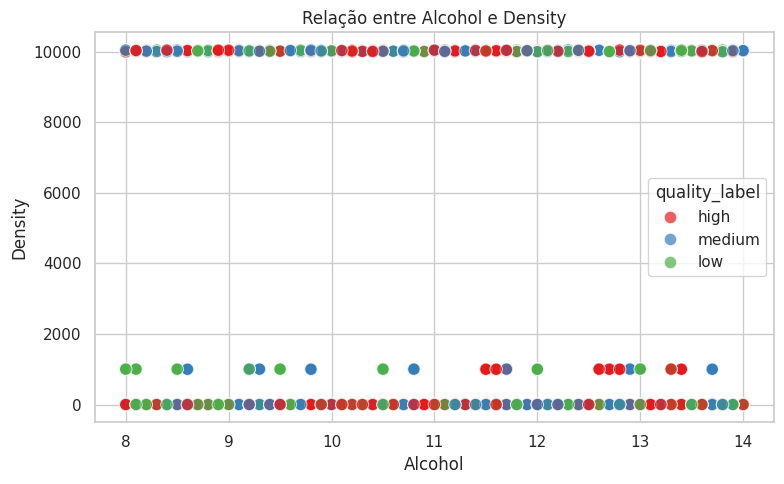

In [166]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=df,
    x='alcohol',
    y='density',
    hue='quality_label',
    palette='Set1',
    s=80,
    alpha=0.7
)

plt.title('Relação entre Alcohol e Density')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.tight_layout()
plt.show()
#plt.title('Multimodalidade: Alcohol vs Density')
#plt.grid(True)
#plt.show()

**Conclusão:**


xxxxxx

> # Step 02: Pairplot

Nesse Step vamos usar uma visualização que mostra gráficos de dispersão para todas as combinações possíveis entre variáveis numéricas de um dataset.
Também exibe, na diagonal, a distribuição de cada variável em forma de histograma ou KDE.



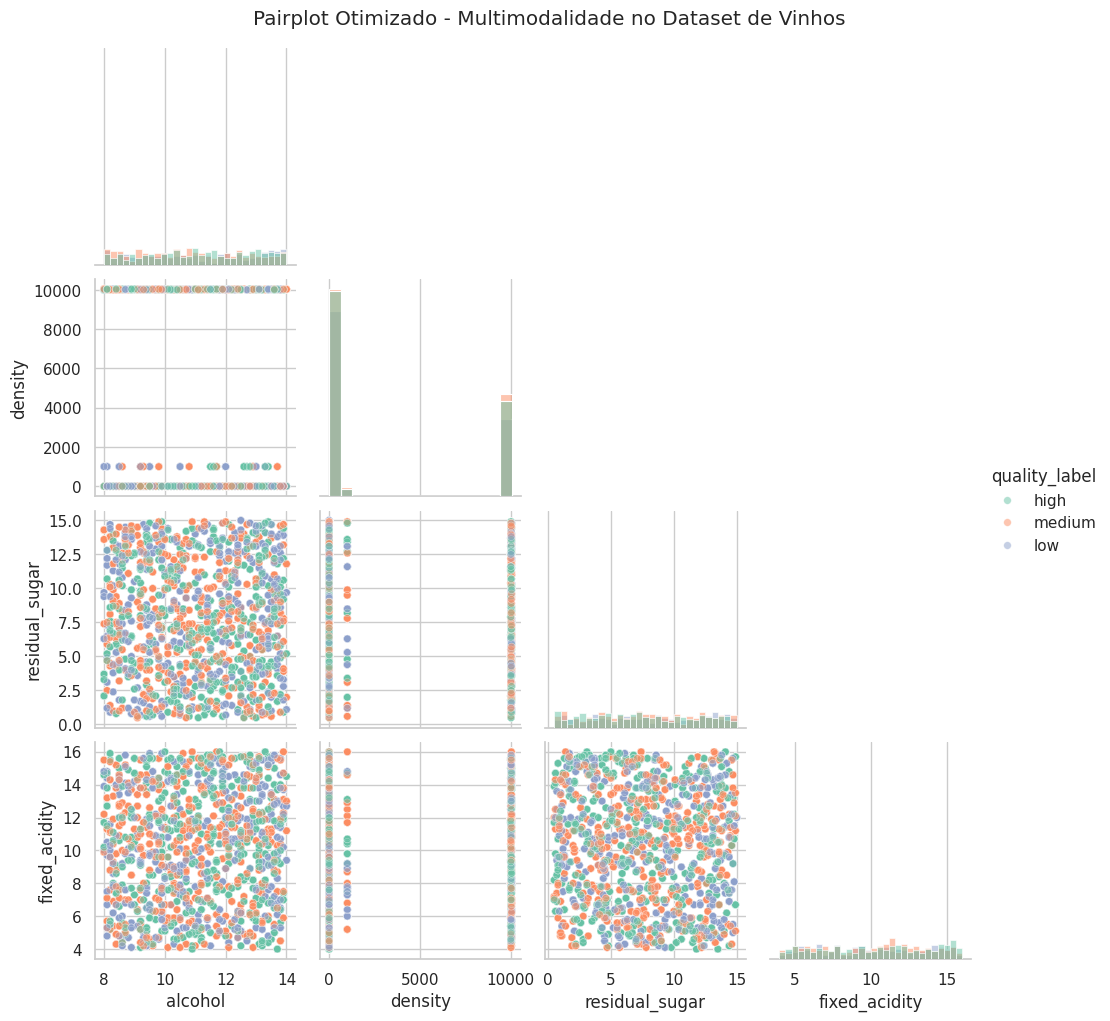

In [172]:
# Amostragem
#sample_df = df.sample(n=1000, random_state=42)

# Selecionar variáveis mais relevantes + variável categórica
cols = ['alcohol', 'density', 'residual_sugar', 'fixed_acidity']
sample_df = df[cols + ['quality_label']]

# Pairplot otimizado
sns.pairplot(
    sample_df,
    hue='quality_label',
    diag_kind='hist',  # mais leve que 'kde'
    palette='Set2',
    corner=True,
    plot_kws={'alpha': 0.5, 's': 30}  # pontos menores e mais leves
)
plt.suptitle('Pairplot Otimizado - Multimodalidade no Dataset de Vinhos', y=1.02)
plt.show()

**Conclusão:**

A variável alcohol apresenta distribuições distintas entre os grupos de qualidade dos rotulos. Podemos observar que pelos dados coletados, vinhos com mais álcool estão relacionados a rotulos com maior qualidade.

A variável density apresenta distorções com valores extremos, o que faz com que esse dataser precise passar pela eliminações de outliers. Podemos observar valores totalmente fora da escala,  10.000+, onde o intervalo normal está entre 0.98 a 1.05.

As variáveis residual_sugar e fixed_acidity não definem bem as classes, o que não ajuda muito a identificar a qualidade do rotulo.

> # Step 03: Heatmap de Correlação

Nesse step , vamos usar uma visualização que mostra o nível de correlação entre variáveis numéricas. Cada célula do gráfico representa o valor da correlação (geralmente de -1 a 1) entre duas variáveis, com cores diferentes indicando a força e direção da relação.

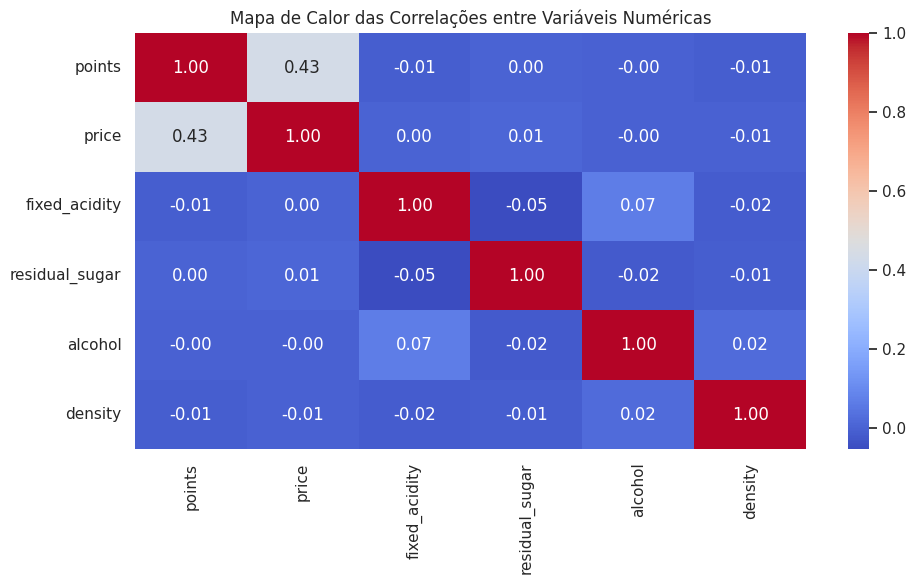

In [164]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor das Correlações entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

**Conclusão:**

A correlação mais relevante observada está entre points e price, com valor de 0.43, indicando que vinhos mais bem avaliados tendem a ser mais caros.

As variáveis fixed_acidity, residual_sugar, alcohol, density apresentam correlações muito fracas entre si e com points ou price.

Podemos analisar que não existe relações lineares fortes entre a maioria das variáveis, o que dificulta as análises baseadas em correlação.

>> # 3.2.2.2. Visualizações Multimodais - Categórica × Numérica

> # Step 01: Boxplot por Categoria (quality_label)

Nesse step xxxxxx

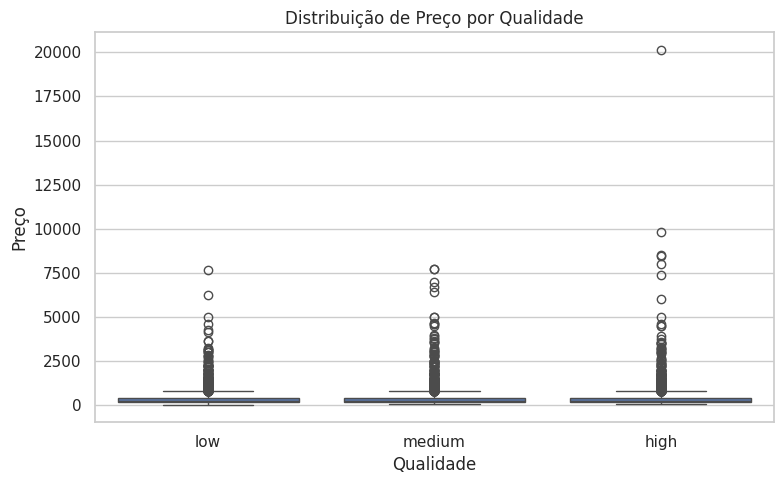

In [165]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='quality_label', y='price', order=['low', 'medium', 'high'])
plt.title('Distribuição de Preço por Qualidade')
plt.xlabel('Qualidade')
plt.ylabel('Preço')
plt.tight_layout()
plt.show()

**Conclusão: **

xxxxxxxxxxxxxxxxxxxxxxxxxxx

> # Step 02: Violin Plot

Nesse step xxxxxx

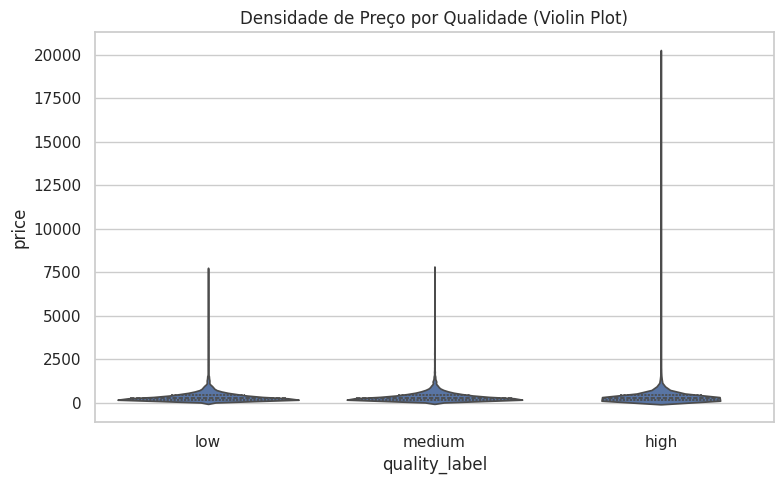

In [167]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='quality_label', y='price', order=['low', 'medium', 'high'], inner='quartile')
plt.title('Densidade de Preço por Qualidade (Violin Plot)')
plt.tight_layout()
plt.show()

**Conclusão:**

xxxxxxxxxxxxxxxxxxxxxxxxxx

> # Step 03: Barplot (média de preço por qualidade)

Nesse step xxxxxx

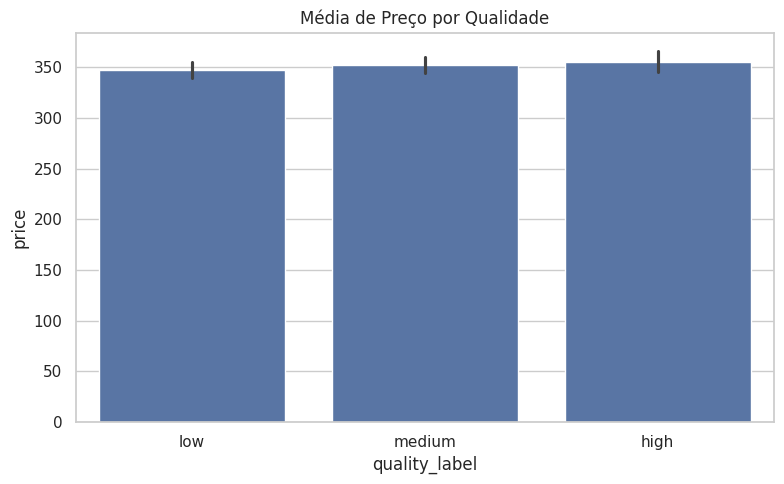

In [168]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='quality_label', y='price', order=['low', 'medium', 'high'], estimator='mean')
plt.title('Média de Preço por Qualidade')
plt.tight_layout()
plt.show()

**Conclusão :**

xxxxxxxxxxxxxxxxxxxxxxxxxx

> # Step 04: Swarm Plot

Nesse step xxxxxx

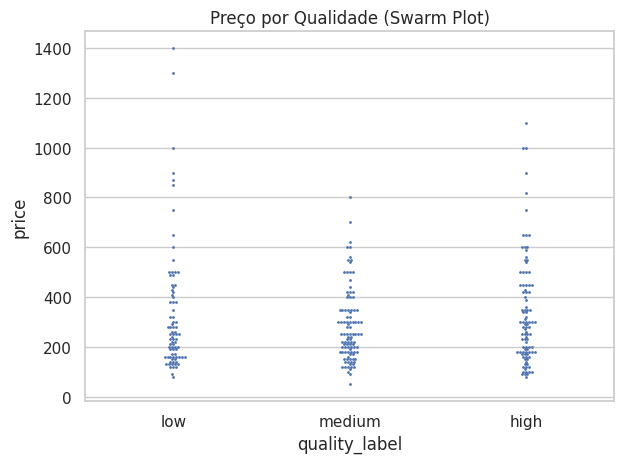

In [169]:
sns.swarmplot(data=df.sample(n=2000, random_state=42), x='quality_label', y='price',
              order=['low', 'medium', 'high'], size=2)
plt.title('Preço por Qualidade (Swarm Plot)')
plt.tight_layout()
plt.show()

**Conclusão :**

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

>> # 3.2.2.3. Visualizações Multimodais - Categórica × Categórica

> # Step 01: Countplot com hue

Nesse step xxxxxx

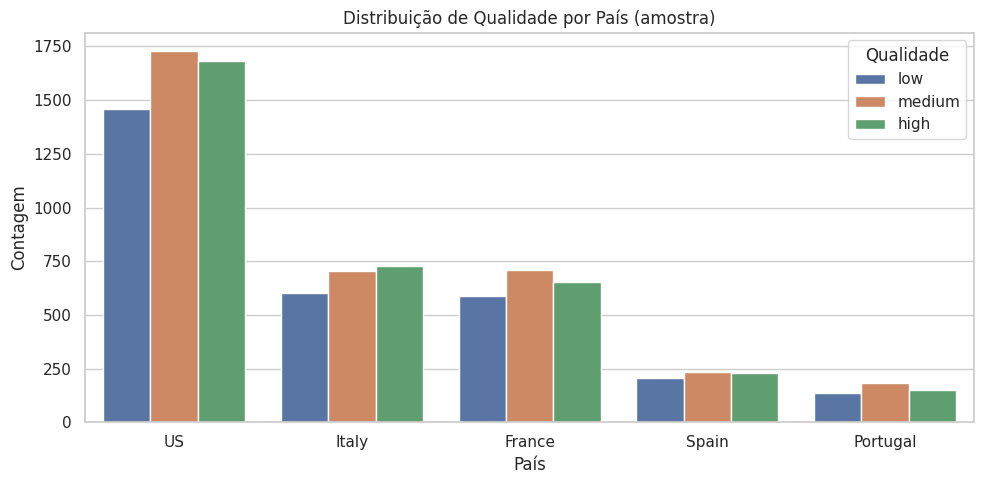

In [170]:
top_paises = df['country'].value_counts().index[:5]
df_top = df[df['country'].isin(top_paises)].sample(n=10000, random_state=42)  # ajustável

plt.figure(figsize=(10, 5))
sns.countplot(data=df_top, x='country', hue='quality_label', order=top_paises,
              hue_order=['low', 'medium', 'high'])
plt.title('Distribuição de Qualidade por País (amostra)')
plt.xlabel('País')
plt.ylabel('Contagem')
plt.legend(title='Qualidade')
plt.tight_layout()
plt.show()

**Conclusão : **

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

> # Step 02: Crosstab + Heatmap

Nesse step xxxxxx

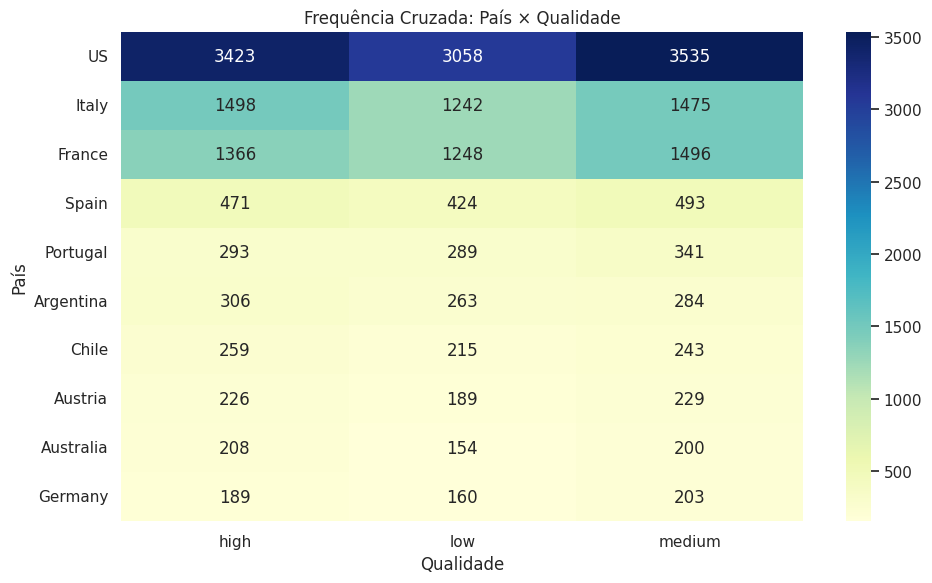

In [171]:
crosstab = pd.crosstab(df['country'], df['quality_label'])
top_crosstab = crosstab.loc[crosstab.sum(axis=1).nlargest(10).index]

plt.figure(figsize=(10, 6))
sns.heatmap(top_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Frequência Cruzada: País × Qualidade')
plt.xlabel('Qualidade')
plt.ylabel('País')
plt.tight_layout()
plt.show()

**Conclusão :**

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">4. Pré Processamento de Dados:</p>

# 4.1 Limpeza

> # Step 01: Identificação de Nulos

In [ ]:
# Total e percentual de valores ausentes por coluna
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_frame = pd.DataFrame({
    'Missing Values': missing,
    '% do Total': missing_percent
}).sort_values(by='Missing Values', ascending=False)

print(missing_frame)

In [ ]:
# recuperando os nomes das colunas
col = list(df.columns)

# o novo dataset irá conter todas as colunas do dataset original
missing_df = df[col[:]]

# substituindo os zeros por NaN
missing_df.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(missing_df)

> # Step 02: Remoção de Linhas Nulas

In [ ]:
# Conta antes
linhas_antes = missing_df.shape[0]

# Remove linhas 100% vazias
missing_df.dropna(how='all', inplace=True)

# Conta depois
linhas_depois = missing_df.shape[0]

# Exibe o resultado
print(f"Linhas antes: {linhas_antes}")
print(f"Linhas depois: {linhas_depois}")
print(f"Linhas removidas: {linhas_antes - linhas_depois}")

> # Step 03: Identificação de Nulos

In [ ]:
# recuperando os nomes das colunas
col = list(missing_df.columns)

# o novo dataset irá conter todas as colunas do dataset original
missing_df = missing_df[col[:]]

# substituindo os zeros por NaN
missing_df.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(missing_df)

In [ ]:
# Total e percentual de valores ausentes por coluna
missing = missing_df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_frame = pd.DataFrame({
    'Missing Values': missing,
    '% do Total': missing_percent
}).sort_values(by='Missing Values', ascending=False)

print(missing_frame)

> # Step 04: Preenchimento de Valores

In [ ]:
#Categóricas

missing_df['designation'].fillna('Sem Designação', inplace=True)
missing_df['country'].fillna('Desconhecido', inplace=True)
missing_df['province'].fillna('Desconhecido', inplace=True)
missing_df['region_1'].fillna('Não Informada', inplace=True)
missing_df['region_2'].fillna('Não Informada', inplace=True)
missing_df['variety'].fillna('Outra', inplace=True)
missing_df['winery'].fillna('Desconhecida', inplace=True)

# Numéricas
missing_df['points'].fillna(missing_df['points'].median(), inplace=True)
missing_df['price'].fillna(30, inplace=True)

> # Step 05: Identificação de Nulos

In [ ]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(missing_df)

In [ ]:

# Total e percentual de valores ausentes por coluna
missing = missing_df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_frame = pd.DataFrame({
    'Missing Values': missing,
    '% do Total': missing_percent
}).sort_values(by='Missing Values', ascending=False)

print(missing_frame)

> # Step 06: Atribuição do Dataset

In [ ]:
df = missing_df.copy()

> # Step 07: Redundancias

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.


In [ ]:
#Tratamento de valores ausentes:

## Remover duplicatas
df.drop_duplicates(inplace=True)


> # Step 08: Outliers

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

In [ ]:
# Garante que 'density' é numérico (caso ainda queira usá-la depois)
df['density'] = pd.to_numeric(df['density'], errors='coerce')

# Lista de colunas numéricas para tratamento de outliers
numeric_cols = ['points', 'price', 'fixed_acidity', 'residual_sugar', 'alcohol']

# Inicializa uma máscara booleana (começa com todos True)
mask = pd.Series(True, index=df.index)

# Para cada coluna, aplica a regra do IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask &= df[col].between(lower, upper)

# Aplica a máscara: mantém apenas as linhas válidas
df_sem_outliers = df[mask]

# Guarda os outliers descartados
outliers_df = df[~mask]

# Exibe exemplos de outliers removidos
print("Exemplos de linhas removidas por outliers:")
outliers_df.head()

df = df_sem_outliers.copy()

In [ ]:
print("="*50)
print("Amostra das 10 ultimas linhas do DataFrame")
print("="*50)
outliers_df.tail(10)

# 4.2 Preparação e Transformação de dados

> # Step 01: Novas Caracteristicas

In [ ]:
#novas características

def faixa_preco(preco):
    if preco == 0:
        return 'Sem Preço'
    elif preco > 0 and preco <= 30:
        return 'baixo'
    elif preco <= 60:
        return 'médio'
    else:
        return 'alto'

df['price_range'] = df['price'].apply(faixa_preco)
df['qpr'] = df['points'] / df['price']
df['full_region'] = df['province'] + ' - ' + df['region_1']
df['alcohol_density_ratio'] = df['alcohol'] / df['density']


df.info()

> # Step 02: Redução de Dimensionalidade

In [ ]:
#codigo aqui

# Seleciona apenas colunas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Selecionar apenas colunas numéricas válidas
X_numeric = df[numeric_cols].copy()


# Normalizar os dados antes do PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


# Aplicar PCA para reduzir para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Substituir as features originais pelas componentes principais
X = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])


plt.figure(figsize=(8,6))
plt.scatter(X['PC1'], X['PC2'], c=pd.Categorical(df['quality_label']).codes, cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Distribuição dos dados após PCA')
plt.colorbar()
plt.show()

> # Step 03: Categorização de Variáveis

In [ ]:
# Conversão de colunas categóricas em códigos numéricos para visualização ou modelagem
for col in ['country', 'designation', 'province', 'region_1', 'region_2',
            'variety', 'winery', 'price_range', 'quality_label', 'full_region']:
    df[f'{col}_code'] = LabelEncoder().fit_transform(df[col])



In [ ]:
    df.head()

> # Step 04: Normalização

In [ ]:
df.dtypes

In [ ]:
# 1. Seleciona colunas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# 2. Normaliza os dados numéricos
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[numeric_cols])

# 3. Cria DataFrame com dados normalizados (mantém o mesmo índice)
df_normalizado = pd.DataFrame(normalized_data, columns=[col  for col in numeric_cols], index=df.index)

# 4. Junta os dados normalizados com o DataFrame original
df_final = pd.concat([df, df_normalizado], axis=1)

# 5. Exibe resultado
print(df_final.head())


In [ ]:
df_final.dtypes

In [ ]:
# Visualização da distribuição após a normalização
cols = df_normalizado.columns
n_cols = 2
n_rows = int(np.ceil(len(cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(df_normalizado[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribuição de {col} (Normalizado)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

# Remove eixos extras, caso existam
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

> # Step 05: Divisão do Conjunto de Dados

In [ ]:
# Define X (variáveis independentes)
X = df_final.drop(columns=['quality_label'])

# Define y (variável alvo)
y = df_final['quality_label']

# Divide em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Exibe as dimensões
print(f"Dimensões de X Treino: {X_train.shape}")
print(f"Dimensões de X Teste: {X_test.shape}")
print(f"Dimensões de y Treino: {y_train.shape}")



In [ ]:

# Cria DataFrame de treino com coluna indicando o conjunto
df_train = X_train.copy()
df_train['dataset_type'] = 'train'

# Cria DataFrame de teste com coluna indicando o conjunto
df_test = X_test.copy()
df_test['dataset_type'] = 'test'

# Junta os dois
df_combined = pd.concat([df_train, df_test])

# Plot da contagem de registros por conjunto
sns.countplot(data=df_combined, x='dataset_type', palette='pastel')
plt.title('Quantidade de Amostras em Treino e Teste')
plt.xlabel('Conjunto')
plt.ylabel('Quantidade')
plt.show()

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">5. Conclusão</p>

A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?* Sim, dado as análises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correlação entre comprimento da pétala e largura da pétala?* Existe forte correlação entre os atributos *petal length* e *petal width*.

3.   *A espécie Iris setosa é mais facilmente separável das outras duas espécies?* Sim, devido às suas características distintas de menor comprimento e largura da pétala.